In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gilphot as gp

In [2]:
galaxies = ['NGC3044', 'NGC3432', 'NGC3501', 'NGC3628', 'NGC4010', 'NGC4013', 
            'NGC4307', 'NGC4330', 'NGC4437', 'NGC4634', 'NGC5907']

masses = [9.78, 9.24, 9.94, 10.47, 9.58, 10.43, 10.24, 9.72, 9.89, 9.81, 10.51]
##err_masses = [0.05, 0.05, 0.05, 0.03, 0.05, 0.06, 0.04, 0.05, 0.04, 0.06, 0.09]
##err_masses_sys = [0.08, 0.08, 0.08, 0.07, 0.07, 0.08, 0.07, 0.13, 0.07, 0.10, 0.28]
err_masses = [0.05, 0.05, 0.05, 0.03, 0.04, 0.06, 0.04, 0.05, 0.04, 0.05, 0.04]
err_masses_sys = [0.07, 0.08, 0.07, 0.06, 0.07, 0.08, 0.07, 0.12, 0.07, 0.08, 0.08]

# log(stellar halo mass fraction) after subtracting disk model
# 4 different definitions of stellar halo region of profile; no extrapolation
halo_defs = [r"$r>5R_d$", r"$r>20\mathrm{ kpc}$", r"$\Sigma_*<10^6 M_\odot/\mathrm{kpc}^2$", r"$r>5R_{1/2}$"]

halo_frac = [[-2.16, -1.30, -1.37, -1.6, -1.81, -1.46, -2.24, np.nan, -2.88, -0.95, -1.21],
             [-2.16, -1.37, -1.57, -1.49, -1.61, -1.46, -2.38, -2.05, -2.88, -1.09, -1.27],
             [-2.34, -1.25, -1.62, -1.64, -1.36, -1.46, -2.21, np.nan, -2.88, -0.92, -1.26],
             [-2.96, -2.04, -1.57, -1.6, -1.68 ,-1.39 ,-2.24, np.nan, -2.64, -1.13, -1.27]
            ]

#err_halo_frac = [[1.55, 0.17, 0.3, 0.32, 0.81, 0.18, 0.37, 1.4, 0.18, 0.33, 0.58],
#                 [1.55, 0.18, 0.57, 0.11, 0.51, 0.18, 0.55, 0.67, 0.35, 0.45, 0.88],
#                 [0.79, 0.16, 0.52, 0.21, 0.17, 0.18, 0.22, 0.4, 0.23, 0.29, 1.29],
#                 [10.54, 0.37, 0.57, 0.3 ,0.63 ,0.14 ,0.37, np.nan, 0.98, 0.49, 1.2]
#                ]

err_halo_frac = [[0.53, 0.18, 0.20, 0.11, 0.16, 0.10, 0.13, 0.52, 0.15, 0.13, 0.17],
                 [0.53, 0.19, 0.26, 0.08, 0.13, 0.10, 0.15, 0.64, 0.15, 0.17, 0.25],
                 [0.46, 0.16, 0.24, 0.10, 0.09, 0.10, 0.12, 0.39, 0.15, 0.13, 0.37],
                 [0.75, 0.39, 0.26, 0.11, 0.15, 0.09, 0.13, np.nan, 0.19, 0.18, 0.34]
                ]

#err_halo_frac_sys = [[3.81, 0.43, 0.48, 1.48, 1.35, 0.53, 0.58, 6.75, 0.37, 0.58, 2.04],
#                     [3.81, 0.49, 0.90, 0.38, 0.86, 0.53, 0.85, 2.20, 0.89, 0.80, 3.09],
#                     [1.72, 0.26, 0.83, 0.95, 0.30, 0.53, 0.34, 1.18, 0.55, 0.51, 4.55],
#                     [26.50,1.26, 0.90, 1.40, 1.07, 0.39, 0.58, np.nan, 2.71, 0.87, 4.21]
#                    ]

err_halo_frac_sys = [[0.94, 0.37, 0.30, 0.17, 0.27, 0.20, 0.22, 1.23, 0.24, 0.20, 0.40],
                     [0.94, 0.41, 0.37, 0.15, 0.22, 0.20, 0.24, 1.99, 0.23, 0.24, 0.60],
                     [0.58, 0.24, 0.34, 0.15, 0.17, 0.20, 0.19, 1.08, 0.24, 0.19, 0.87],
                     [1.07, 0.57, 0.37, 0.16, 0.24, 0.17, 0.22, np.nan, 0.33, 0.26, 0.81]
                    ]

halo_upperlim = [[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -2.14, np.nan, np.nan, np.nan],
                 [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                 [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -1.01, np.nan, np.nan, np.nan],
                 [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, -3.74, np.nan, np.nan, np.nan]
                ]

Above errors are d(log(frac)); converting to log(dfrac)

$$ \Delta(log(f)) = log(e) \Delta f/f $$

$$ \Delta f = \Delta(log(f)) \times f / log(e) $$

In [3]:
lin_err_halo_frac = np.zeros((4, 2, 11))

err_halo_frac_temp = np.power(10, halo_frac) * err_halo_frac / np.log10(np.e)

lowerlim = halo_frac - np.log10(np.power(10, halo_frac) - err_halo_frac_temp)
np.nan_to_num(lowerlim, nan=5, copy=False)

upperlim = np.log10(np.power(10, halo_frac) + err_halo_frac_temp) - halo_frac

for x in range(0,4):
    
    lin_err_halo_frac[x,0,:] = lowerlim[x]
    lin_err_halo_frac[x,1,:] = upperlim[x]
    
    
lin_err_halo_frac_sys = np.zeros((4, 2, 11))

err_halo_frac_temp = np.power(10, halo_frac) * err_halo_frac_sys / np.log10(np.e)

lowerlim = halo_frac - np.log10(np.power(10, halo_frac) - err_halo_frac_temp)
np.nan_to_num(lowerlim, nan=5, copy=False)

upperlim = np.log10(np.power(10, halo_frac) + err_halo_frac_temp) - halo_frac

for x in range(0,4):
    
    lin_err_halo_frac_sys[x,0,:] = lowerlim[x]
    lin_err_halo_frac_sys[x,1,:] = upperlim[x]


/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


In [4]:
DNGS_galaxies = ["NGC1042", "NGC1084", "NGC2903", "NGC3351", "NGC3368", "NGC4220", "NGC4258", "M101"]
DNGS_masses = [10.18, 10.64, 10.69, 10.77, 10.95, 10.79, 10.88, 10.77]
DNGS_err_masses = [0.14, 0.14, 0.14, 0.15, 0.14, 0.14, 0.14, 0.14]

DNGS_halo_frac = [np.nan, -1.31, -1.98, np.nan, -2.43, -1.88, -2.52, np.nan]
DNGS_err_halo_frac = [np.nan, 0.2, 0.3, np.nan, 3.4, 0.36, 2.3, np.nan]
DNGS_halo_upperlim = [-4, np.nan, np.nan, -3.7, np.nan, np.nan, np.nan, -3.4]

# Errors in linear space:

lin_DNGS_err_halo_frac = np.zeros((2,8))

temp_err = np.power(10, DNGS_halo_frac) * DNGS_err_halo_frac / np.log10(np.e)
temp_lowerlim = DNGS_halo_frac - np.log10(np.power(10, DNGS_halo_frac) - temp_err)
np.nan_to_num(temp_lowerlim, nan=5, copy=False)
temp_upperlim = np.log10(np.power(10, DNGS_halo_frac) + temp_err) - DNGS_halo_frac

lin_DNGS_err_halo_frac = [temp_lowerlim, temp_upperlim]


/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


In [5]:
GHOSTS_galaxies = ["NGC253", "NGC891", "NGC3031", "NGC4565", "NGC4945", "NGC7814"]
GHOSTS_masses = [10.74, 10.72, 10.75, 10.90, 10.58, 10.65]
GHOSTS_err_masses = [0.11, 0.11, 0.11, 0.11, 0.11, 0.11]

GHOSTS_halo_frac = [-1.58, -2.79, -2.18, -2.05, -1.53, -1.34]
GHOSTS_err_halo_frac = [[0.11, 0.11, 0.11, 0.11, 0.11, 0.12],
                        [0.12, 0.11, 0.12, 0.11, 0.11, 0.14]]

GHOSTS_halo_frac_extrap = [-1.08, -1.29, -1.69, -1.55, -1.04, -0.85]
GHOSTS_err_halo_frac_extrap = [[0.11, 0.11, 0.11, 0.11, 0.11, 0.12],
                               [0.12, 0.11, 0.12, 0.11, 0.11, 0.14]]

# Errors in linear space:

lin_GHOSTS_err_halo_frac = np.zeros((2,6))

temp_err_l = np.power(10, GHOSTS_halo_frac_extrap) * GHOSTS_err_halo_frac_extrap[0] / np.log10(np.e)
temp_err_u = np.power(10, GHOSTS_halo_frac_extrap) * GHOSTS_err_halo_frac_extrap[1] / np.log10(np.e)
temp_lowerlim = GHOSTS_halo_frac_extrap - np.log10(np.power(10, GHOSTS_halo_frac_extrap) - temp_err_l)
np.nan_to_num(temp_lowerlim, nan=5, copy=False)
temp_upperlim = np.log10(np.power(10, GHOSTS_halo_frac_extrap) + temp_err_u) - GHOSTS_halo_frac_extrap

lin_GHOSTS_err_halo_frac = [temp_lowerlim, temp_upperlim]

In [6]:
# Jang et al. 2020 
M101_masses = [10.61]
M101_err_masses = [0.13]
M101_halo_frac = [-2.70]
M101_err_halo_frac = [[0.17],[0.22]]
lin_M101_err_halo_frac = [[0.22],[0.18]]

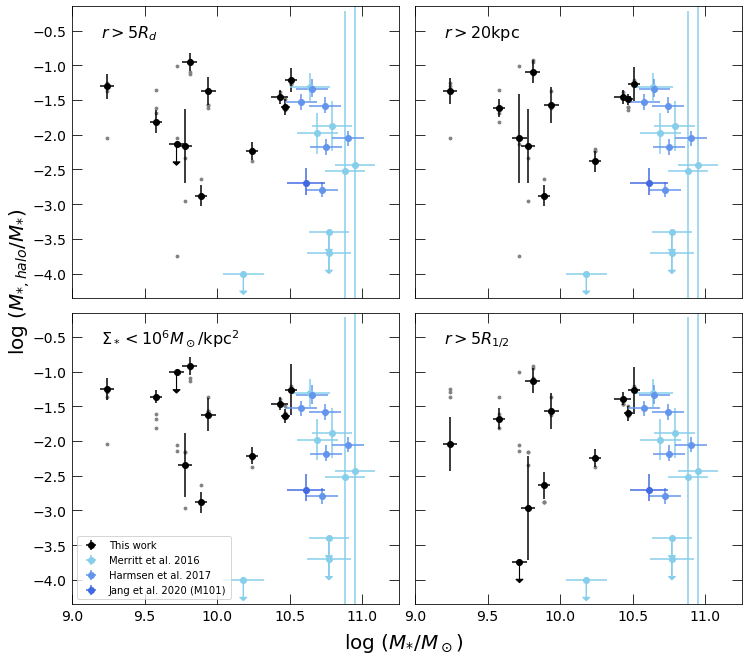

In [7]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.2, -0.6), size=16)
    
    for j in range(4):
        if j != i:
            axis.scatter(masses, halo_frac[j], color="grey", s=8)
            axis.scatter(masses, halo_upperlim[j], color="grey", s=8)
            
    axis.errorbar(masses, halo_frac[i], xerr=err_masses, yerr=err_halo_frac[i], fmt='o', color='k', label="This work")
    axis.errorbar(masses, halo_upperlim[i], xerr=err_masses, fmt='o', color='k')

    for k, upper in enumerate(halo_upperlim[i]):
        if np.isfinite(upper):
            axis.arrow(masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='k')
    
    # DNGS (Merritt+2016)
    axis.errorbar(DNGS_masses, DNGS_halo_frac, xerr=DNGS_err_masses, yerr=DNGS_err_halo_frac, fmt='o', color='skyblue', label="Merritt et al. 2016")
    axis.errorbar(DNGS_masses, DNGS_halo_upperlim, xerr=DNGS_err_masses, fmt='o', color='skyblue')
    
    for k, upper in enumerate(DNGS_halo_upperlim):
        if np.isfinite(upper):
            axis.arrow(DNGS_masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='skyblue')
            
    # GHOSTS (Harmsen+2017)
    axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=GHOSTS_err_halo_frac, fmt='o', color='cornflowerblue', label="Harmsen et al. 2017")
 
    # M101 (Dragonfly + HST; Jang+2020)
    axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=M101_err_halo_frac, fmt='o', color='royalblue', label="Jang et al. 2020 (M101)")

    if i == 2:
        axis.legend(loc=3)
    
    axis.set_xlim(9,11.25)
    axis.set_xticks([9, 9.5, 10, 10.5, 11])
    
    axis.set_ylim(-4.35, -0.15)
    axis.set_yticks([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=14)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.07, "log $(M_{*}/M_\odot)$", size=20)
fig.text(0.05, 0.45, r"log $(M_{*, halo}/M_{*})$", size=20, rotation=90)

fig.set_size_inches(12,11)
plt.show()

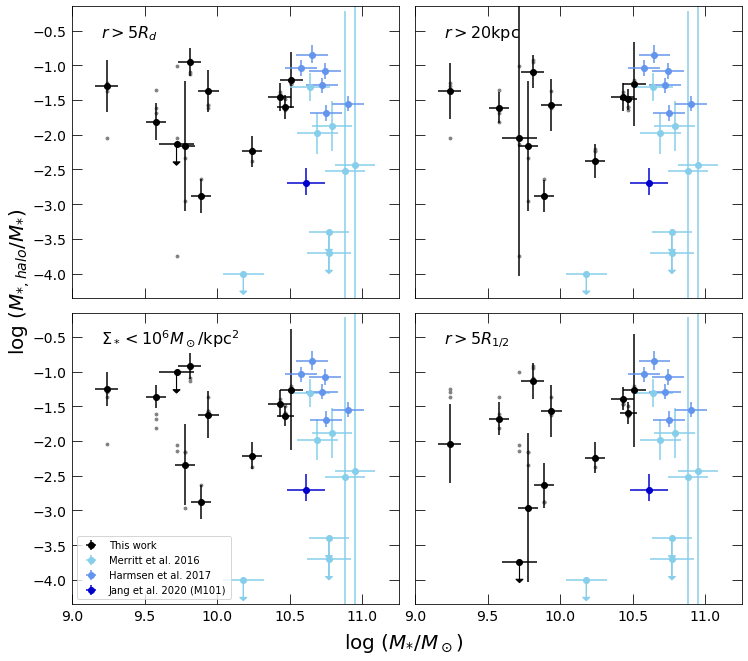

In [8]:
# Stellar halo mass fraction vs total stellar mass
# Random + systematic error bars, showing d(log(frac))

fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.2, -0.6), size=16)
    
    for j in range(4):
        if j != i:
            axis.scatter(masses, halo_frac[j], color="grey", s=8)
            axis.scatter(masses, halo_upperlim[j], color="grey", s=8)
            
    axis.errorbar(masses, halo_frac[i], xerr=err_masses_sys, yerr=err_halo_frac_sys[i], fmt='o', color='k', label="This work")
    axis.errorbar(masses, halo_upperlim[i], xerr=err_masses_sys, fmt='o', color='k')

    for k, upper in enumerate(halo_upperlim[i]):
        if np.isfinite(upper):
            axis.arrow(masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='k')
    
    # DNGS (Merritt+2016)
    axis.errorbar(DNGS_masses, DNGS_halo_frac, xerr=DNGS_err_masses, yerr=DNGS_err_halo_frac, fmt='o', color='skyblue', label="Merritt et al. 2016")
    axis.errorbar(DNGS_masses, DNGS_halo_upperlim, xerr=DNGS_err_masses, fmt='o', color='skyblue')
    
    for k, upper in enumerate(DNGS_halo_upperlim):
        if np.isfinite(upper):
            axis.arrow(DNGS_masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='skyblue')
            
    # GHOSTS (Harmsen+2017)
    axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac_extrap, xerr=GHOSTS_err_masses, yerr=GHOSTS_err_halo_frac, fmt='o', color='cornflowerblue', label="Harmsen et al. 2017")
 
    # M101 (Dragonfly + HST; Jang+2020)
    axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=M101_err_halo_frac, fmt='o', color='mediumblue', label="Jang et al. 2020 (M101)")

    if i == 2:
        axis.legend(loc=3)
    
    axis.set_xlim(9,11.25)
    axis.set_xticks([9, 9.5, 10, 10.5, 11])
    
    axis.set_ylim(-4.35, -0.15)
    axis.set_yticks([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=14)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.07, "log $(M_{*}/M_\odot)$", size=20)
fig.text(0.05, 0.45, r"log $(M_{*, halo}/M_{*})$", size=20, rotation=90)

fig.set_size_inches(12,11)
plt.show()

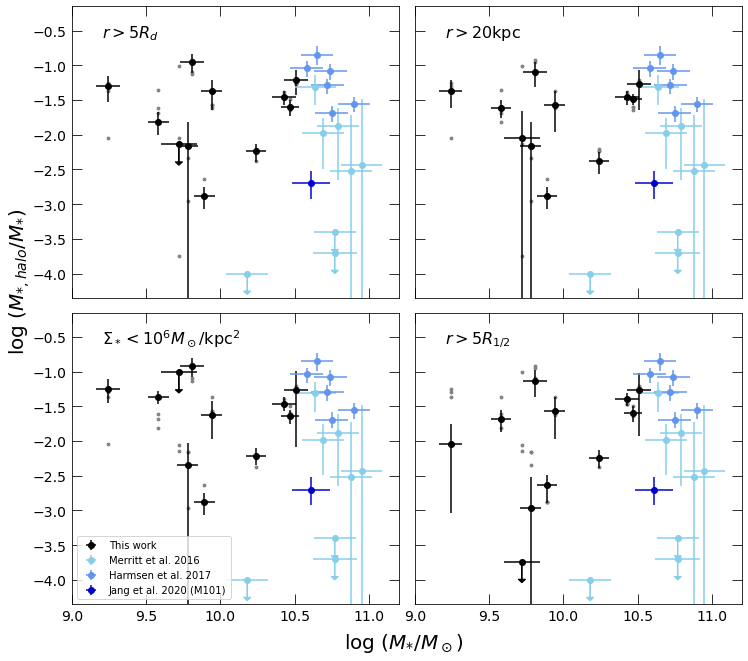

In [9]:
# Stellar halo mass fraction vs total stellar mass
# Random error bars, showing log(dfrac)

fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.2, -0.6), size=16)
    
    for j in range(4):
        if j != i:
            axis.scatter(masses, halo_frac[j], color="grey", s=8)
            axis.scatter(masses, halo_upperlim[j], color="grey", s=8)
            
    axis.errorbar(masses, halo_frac[i], xerr=err_masses_sys, yerr=lin_err_halo_frac[i], fmt='o', color='k', label="This work")
    axis.errorbar(masses, halo_upperlim[i], xerr=err_masses_sys, fmt='o', color='k')

    for k, upper in enumerate(halo_upperlim[i]):
        if np.isfinite(upper):
            axis.arrow(masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='k')
    
    # DNGS (Merritt+2016)
    axis.errorbar(DNGS_masses, DNGS_halo_frac, xerr=DNGS_err_masses, yerr=lin_DNGS_err_halo_frac, fmt='o', color='skyblue', label="Merritt et al. 2016")
    axis.errorbar(DNGS_masses, DNGS_halo_upperlim, xerr=DNGS_err_masses, fmt='o', color='skyblue')
    
    for k, upper in enumerate(DNGS_halo_upperlim):
        if np.isfinite(upper):
            axis.arrow(DNGS_masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='skyblue')
            
    # GHOSTS (Harmsen+2017)
    axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac_extrap, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac, fmt='o', color='cornflowerblue', label="Harmsen et al. 2017")
 
    # M101 (Dragonfly + HST; Jang+2020)
    axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', color='mediumblue', label="Jang et al. 2020 (M101)")

    if i == 2:
        axis.legend(loc=3)
    
    axis.set_xlim(9,11.2)
    axis.set_xticks([9, 9.5, 10, 10.5, 11])
    
    axis.set_ylim(-4.35, -0.15)
    axis.set_yticks([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=14)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.07, "log $(M_{*}/M_\odot)$", size=20)
fig.text(0.05, 0.45, r"log $(M_{*, halo}/M_{*})$", size=20, rotation=90)

fig.set_size_inches(12,11)
plt.show()

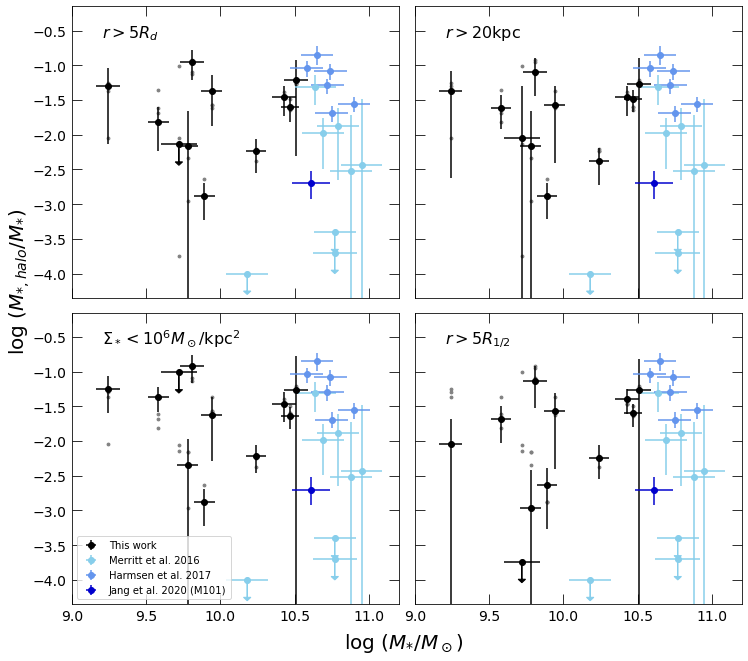

In [10]:
# Stellar halo mass fraction vs total stellar mass
# Random + systematic error bars, showing log(dfrac)

fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.2, -0.6), size=16)
    
    for j in range(4):
        if j != i:
            axis.scatter(masses, halo_frac[j], color="grey", s=8)
            axis.scatter(masses, halo_upperlim[j], color="grey", s=8)
            
    axis.errorbar(masses, halo_frac[i], xerr=err_masses_sys, yerr=lin_err_halo_frac_sys[i], fmt='o', color='k', label="This work")
    axis.errorbar(masses, halo_upperlim[i], xerr=err_masses_sys, fmt='o', color='k')

    for k, upper in enumerate(halo_upperlim[i]):
        if np.isfinite(upper):
            axis.arrow(masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='k')
    
    # DNGS (Merritt+2016)
    axis.errorbar(DNGS_masses, DNGS_halo_frac, xerr=DNGS_err_masses, yerr=lin_DNGS_err_halo_frac, fmt='o', color='skyblue', label="Merritt et al. 2016")
    axis.errorbar(DNGS_masses, DNGS_halo_upperlim, xerr=DNGS_err_masses, fmt='o', color='skyblue')
    
    for k, upper in enumerate(DNGS_halo_upperlim):
        if np.isfinite(upper):
            axis.arrow(DNGS_masses[k], upper, 0, -0.25, head_length=0.05, head_width=0.05, color='skyblue')
            
    # GHOSTS (Harmsen+2017)
    axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac_extrap, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac, fmt='o', color='cornflowerblue', label="Harmsen et al. 2017")
 
    # M101 (Dragonfly + HST; Jang+2020)
    axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', color='mediumblue', label="Jang et al. 2020 (M101)")

    if i == 2:
        axis.legend(loc=3)
    
    axis.set_xlim(9,11.2)
    axis.set_xticks([9, 9.5, 10, 10.5, 11])
    
    axis.set_ylim(-4.35, -0.15)
    axis.set_yticks([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=14)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.07, "log $(M_{*}/M_\odot)$", size=20)
fig.text(0.05, 0.45, r"log $(M_{*, halo}/M_{*})$", size=20, rotation=90)

fig.set_size_inches(12,11)
plt.show()